### 제안 3: 거래 유형별 고객 행동 분석
- 문제 정의:
   + 거래 유형(TransactionType)과 고객의 위치(Location)에 따라 고객의 행동 패턴을 분석합니다.

- 목표:
   + 지역별 거래 유형 비율 비교
   + 고객이 선호하는 거래 유형과 시간대 분석
   + 환불(refund) 요청 비율 및 환불 금액 분포 확인
  
- 배경 : 고객 행동 패턴을 이해하면, 특정 지역에서 선호되는 상품이나 서비스를 파악하고 환불 정책 개선에 활용할 수 있습니다.

- 인사이트 : 지역별 거래 유형 비율 비교 -> 별 차이 없다.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns
import pandas as pd
df_cfd = pd.read_csv('../../datasets/credit_card_fraud_dataset.csv')
df_cfd.head(3)

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0


In [2]:
df_cfd.info(), df_cfd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


(None,
        TransactionID         Amount     MerchantID        IsFraud
 count  100000.000000  100000.000000  100000.000000  100000.000000
 mean    50000.500000    2497.092666     501.676070       0.010000
 std     28867.657797    1442.415999     288.715868       0.099499
 min         1.000000       1.050000       1.000000       0.000000
 25%     25000.750000    1247.955000     252.000000       0.000000
 50%     50000.500000    2496.500000     503.000000       0.000000
 75%     75000.250000    3743.592500     753.000000       0.000000
 max    100000.000000    4999.770000    1000.000000       1.000000)

#### 지역별 거래 유형 비율 비교

In [3]:
df_cfd['Location'].unique() # 지역 정보

array(['San Antonio', 'Dallas', 'New York', 'Philadelphia', 'Phoenix',
       'Chicago', 'San Jose', 'San Diego', 'Houston', 'Los Angeles'],
      dtype=object)

In [4]:
df_cfd['TransactionType'].unique()

array(['refund', 'purchase'], dtype=object)

In [5]:
df_cfd['Location'].value_counts()

Location
Chicago         10193
San Diego       10111
Dallas          10076
San Antonio     10062
New York         9993
Houston          9991
Phoenix          9960
Los Angeles      9936
Philadelphia     9873
San Jose         9805
Name: count, dtype: int64

In [6]:
df_cfd['TransactionType'].value_counts()

TransactionType
refund      50131
purchase    49869
Name: count, dtype: int64

In [7]:
df_cfd['Location'].describe()

count      100000
unique         10
top       Chicago
freq        10193
Name: Location, dtype: object

In [8]:
df_cfd['TransactionType'].describe()

count     100000
unique         2
top       refund
freq       50131
Name: TransactionType, dtype: object

In [9]:
# 위치: 거래의 지리적 위치로, 지역별 사기 동향을 쉽게 분석할 수 있습니다. 여기에 왜 거래량이 들어있는지 아직도 의문?
# 어떻게 매칭시켜 만들어야 할지?
# 매칭을 시키는게 아닌 단순 표현이 맞는 방향일지?
# 결과가 너무 다 비슷 비슷함

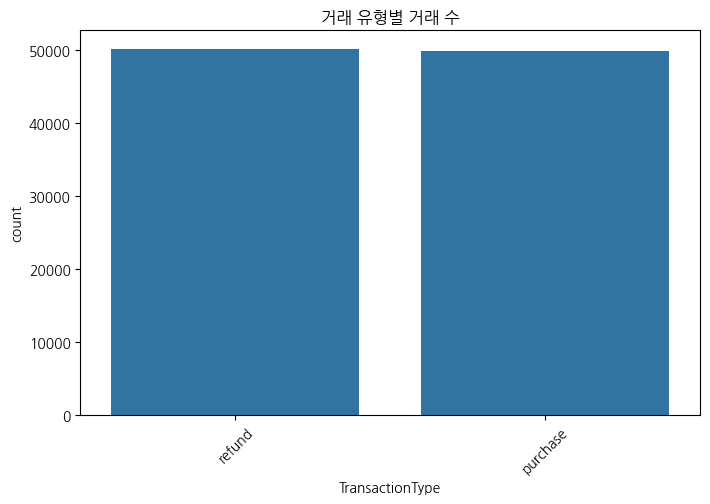

In [10]:
plt.figure(figsize= (8,5))
sns.countplot(data = df_cfd, x = 'TransactionType', order = df_cfd['TransactionType'].value_counts().index)
plt.title('거래 유형별 거래 수')
plt.xticks(rotation=45)
plt.show()

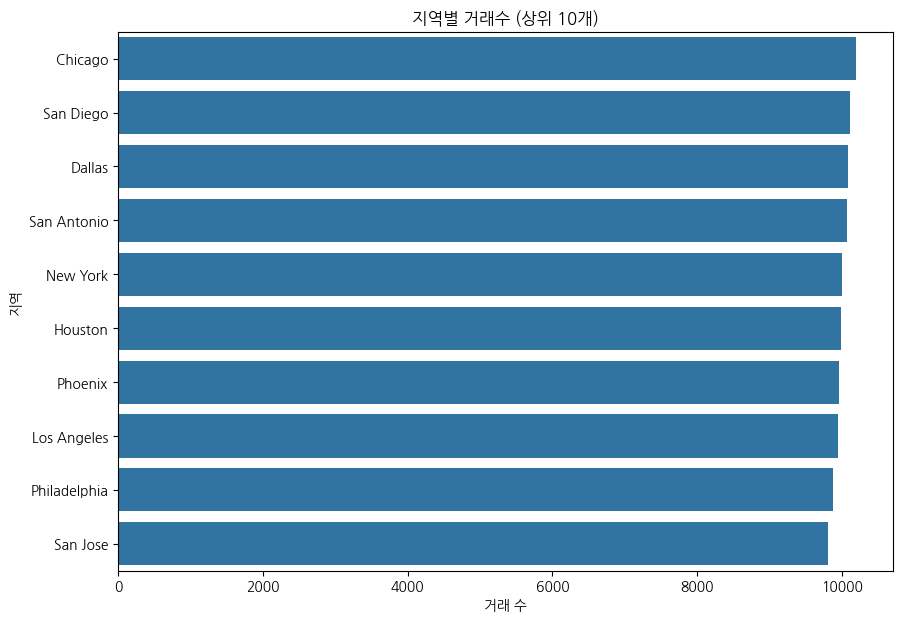

In [11]:
plt.figure(figsize = (10,7))
sns.countplot(data = df_cfd, y='Location', order=df_cfd['Location'].value_counts().index[:10])
plt.title('지역별 거래수 (상위 10개)')
plt.xlabel('거래 수')
plt.ylabel('지역')
plt.show()

In [12]:
# 두개 합치기
locations_info = ['San Antonio', 'Dallas', 'New York', 'Philadelphia', 'Phoenix',
       'Chicago', 'San Jose', 'San Diego', 'Houston', 'Los Angeles']
fillter_data = df_cfd[df_cfd['Location'].isin(locations_info)]

pivot_data = fillter_data.pivot_table(index='Location', columns='TransactionType', aggfunc = 'size', fill_value = 0 )

<function matplotlib.pyplot.show(close=None, block=None)>

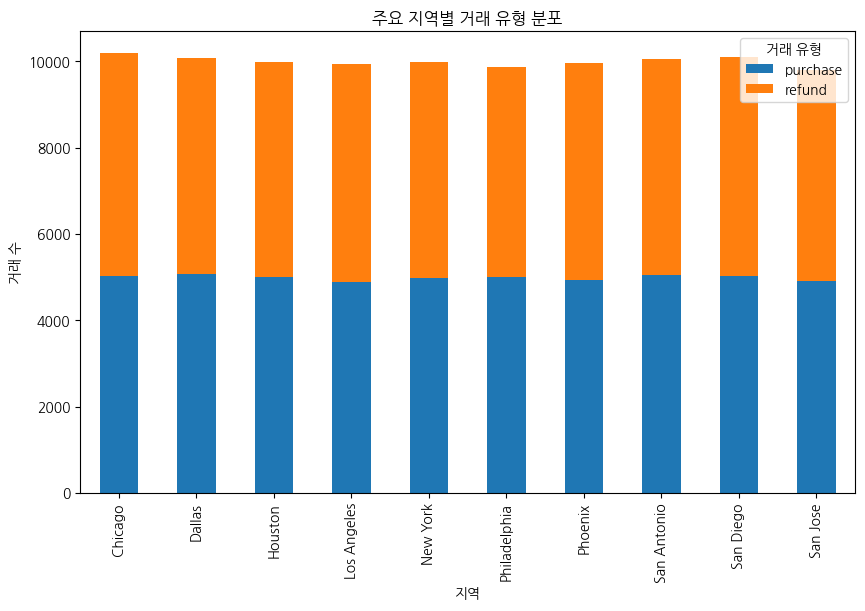

In [13]:
pivot_data.plot(kind='bar', stacked=True, figsize = (10,6))
plt.title('주요 지역별 거래 유형 분포')
plt.xlabel('지역')
plt.ylabel('거래 수')
plt.legend(title='거래 유형')
plt.show


In [14]:
df_cfd['TransactionDate'].unique()
df_cfd['TransactionDate'].value_counts()

TransactionDate
2023-10-30 06:53:36.027441    1
2024-07-11 10:55:36.027444    1
2023-11-23 08:37:36.027449    1
2024-09-07 05:03:36.027453    1
2024-03-29 11:33:36.027457    1
                             ..
2024-04-13 23:50:35.462850    1
2024-07-12 18:51:35.462858    1
2024-08-30 01:52:35.462867    1
2024-01-02 11:31:35.462875    1
2024-05-12 12:25:35.462885    1
Name: count, Length: 100000, dtype: int64

In [15]:
# 1. 날짜 데이터 처리해 거래 시간대 추출
# TransactionDate가 날짜형이 아닌 문자열일 경우 datetime으로 변환
df_cfd['TransactionDate'] = pd.to_datetime(df_cfd['TransactionDate'])
df_cfd['Hour'] = df_cfd['TransactionDate'].dt.hour # 시간대 추출

In [16]:
# 2. 거래 유형(TransactionType)별로 선호도 분석
transaction_type_counts = df_cfd['TransactionType'].value_counts()
transaction_type_counts

TransactionType
refund      50131
purchase    49869
Name: count, dtype: int64

/tmp/ipykernel_572/2419761783.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = transaction_type_counts.index, y = transaction_type_counts.values, palette='coolwarm')


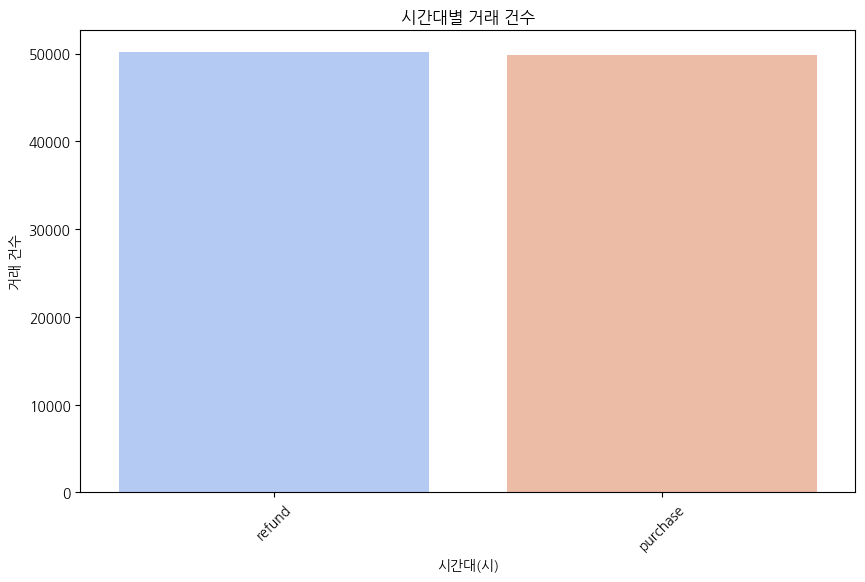

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x = transaction_type_counts.index, y = transaction_type_counts.values, palette='coolwarm')
plt.title('시간대별 거래 건수')
plt.xlabel('시간대(시)')
plt.ylabel('거래 건수')
plt.xticks(rotation=45)
plt.show()

In [18]:
# 3. 시간대별 거래 건수 분석
hourly_transaction_counts = df_cfd['Hour'].value_counts().sort_index()
hourly_transaction_counts

Hour
0     4187
1     4153
2     4105
3     4133
4     4255
5     4145
6     4268
7     4126
8     4096
9     4059
10    4237
11    4168
12    4214
13    4131
14    4238
15    4155
16    4251
17    4080
18    4220
19    4179
20    4136
21    4186
22    4115
23    4163
Name: count, dtype: int64

/tmp/ipykernel_572/2645077620.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = hourly_transaction_counts.index, y=hourly_transaction_counts.values, palette='viridis')


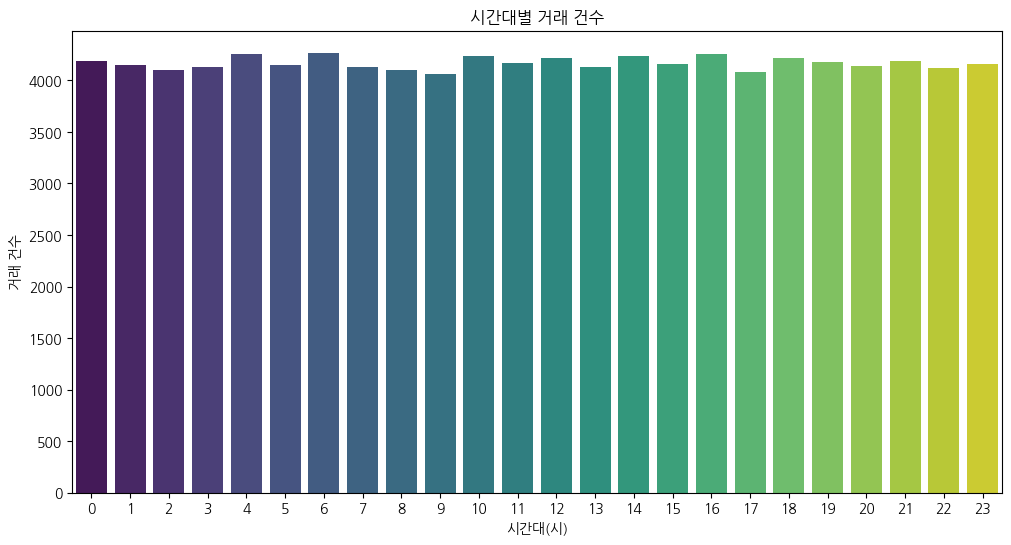

In [19]:
plt.figure(figsize = (12,6))
sns.barplot(x = hourly_transaction_counts.index, y=hourly_transaction_counts.values, palette='viridis')
plt.title('시간대별 거래 건수')
plt.xlabel('시간대(시)')
plt.ylabel('거래 건수')
plt.xticks(range(0,24))
plt.show()

In [20]:
df_cfd.columns

Index(['TransactionID', 'TransactionDate', 'Amount', 'MerchantID',
       'TransactionType', 'Location', 'IsFraud', 'Hour'],
      dtype='object')

In [21]:
# 4. 환불 비율 및 금액 분포 확인
# 환불 요청이 있는 데이터 필터링
refund_data = df_cfd[df_cfd['TransactionType'] == 'refund'] # 환불 데이터만 선택
refund_rate = len(refund_data) / len(df_cfd) * 100 # 환불 비율 계산

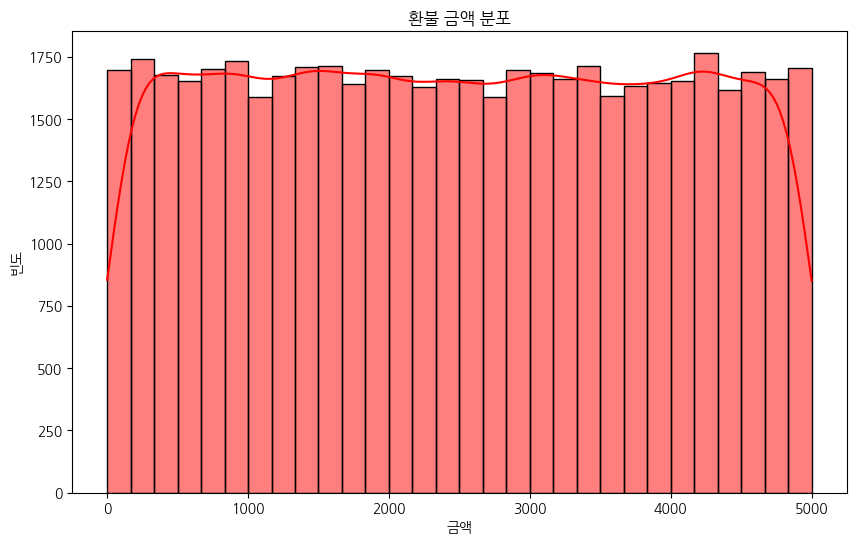

In [22]:
# 환불금액 분포 시각화
plt.figure(figsize = (10,6))
sns.histplot(refund_data['Amount'], bins=30, kde=True, color='red')
plt.title('환불 금액 분포')
plt.xlabel('금액')
plt.ylabel('빈도')
plt.show()

/tmp/ipykernel_572/1937850107.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=refund_hourly_counts.index, y=refund_hourly_counts.values, palette='magma')


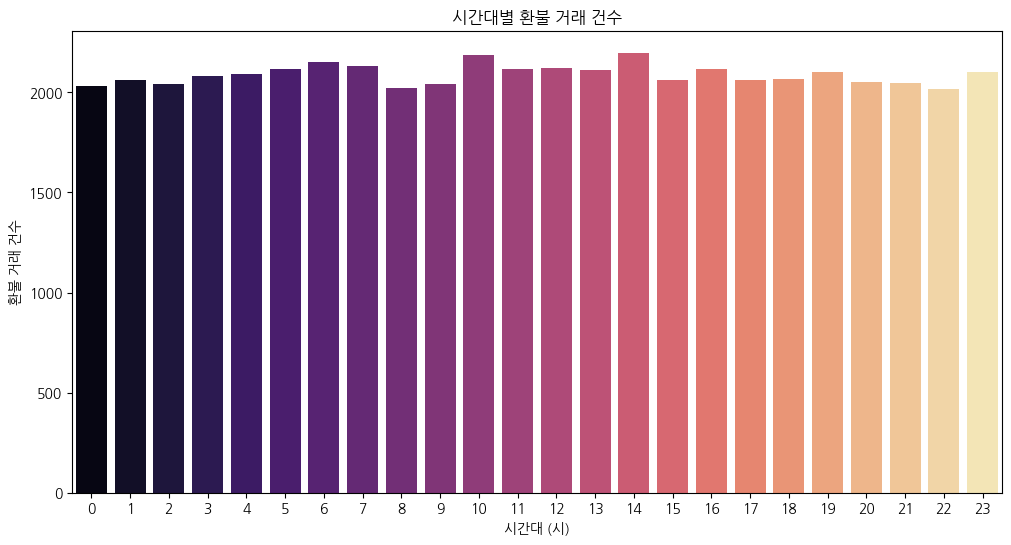

In [23]:
# 3. 환불 데이터의 시간대 분석
refund_hourly_counts = refund_data['Hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=refund_hourly_counts.index, y=refund_hourly_counts.values, palette='magma')
plt.title('시간대별 환불 거래 건수')
plt.xlabel('시간대 (시)')
plt.ylabel('환불 거래 건수')
plt.xticks(range(0, 24))
plt.show()